# Task 1 - ResNet18 Image Classification Model

# 1. Setup Environment

In [23]:
import torch
import torch.optim as optim
from torch import nn
from torchvision import transforms
from torchvision.models import resnet18
from torch.utils.data import Dataset, DataLoader, random_split
import matplotlib.pyplot as plt
import os
from PIL import Image # import PIL library
import os
import pandas as pd
import numpy as np
import csv
import hashlib
from tqdm import tqdm
device = "cuda"

# 2. Exploratory data analysis

## 2.1. Analyzing Dataset

In [ ]:
# Define the path to dataset folder
dataset_folder = "Flowers"

# Get the list of sub-folders in the dataset folder
sub_folders = [folder for folder in os.listdir(dataset_folder) if os.path.isdir(os.path.join(dataset_folder, folder))]

# Initialize a dictionary to store the count of images in each sub-folder
sub_folder_counts = {}

# Count the number of images in each sub-folder
for folder in sub_folders:
    folder_path = os.path.join(dataset_folder, folder)
    file_count = len([file for file in os.listdir(folder_path) if file.endswith((".jpg", ".png", ".jpeg"))])
    sub_folder_counts[folder] = file_count

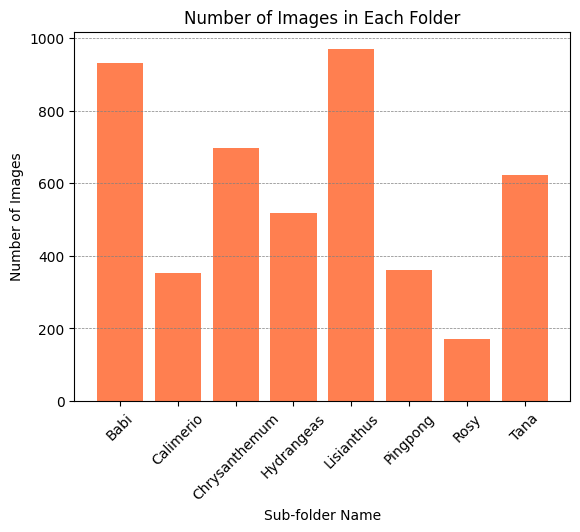

In [ ]:
# Create the bar chart
labels = list(sub_folder_counts.keys())
counts = list(sub_folder_counts.values())

plt.bar(labels, counts, color='coral')
plt.xlabel("Sub-folder Name")
plt.ylabel("Number of Images")
plt.title("Number of Images in Each Folder")
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', axis = 'y')
plt.xticks(rotation=45)
plt.show()

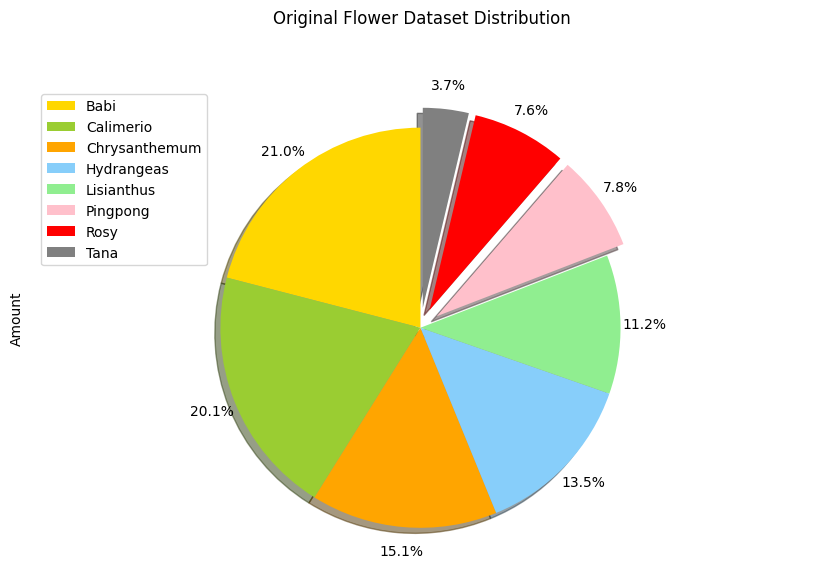

In [ ]:
# Create pie chart 
cols = ['Amount']
df = pd.DataFrame(sub_folder_counts, index = [0])
df = df.transpose()
df.columns = cols

colors_list = ['gold', 'yellowgreen', 'orange', 'lightskyblue', 'lightgreen', 'pink', 'red', 'gray']
explode_list = [0, 0, 0, 0, 0, 0.1, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df['Amount'].sort_values(ascending = False).plot(kind='pie',
                    figsize=(10, 6),
                    autopct='%1.1f%%', 
                    startangle=90,    
                    shadow=True,       
                    labels=None,         # turn off labels on pie chart
                    pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                    colors=colors_list,  # add custom colors
                    explode=explode_list 
                    )

# scale the title up by 12% to match pctdistance
plt.title('Original Flower Dataset Distribution', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df.index, loc='upper left') 

plt.show()

The dataset provided comprises a total of eight distinct flower types, namely Baby, Calimero, Chrysanthemum, Hydrangeas, Lisianthus, Pingpong, Rosy, and Tana. Upon examination of the floral imagery contained within the dataset, a number of factors have been identified that could possibly affect the precision of the models.
Certain images may lack sufficient clarity for analysis and therefore may not be suitable as training data for the classification model. In particular, these pictures have either too many different kinds of flowers or flowers that cannot be identified from the picture. The photos in the first figure are some of the examples raising the issue. 
An additional issue that causes attention is the uneven distribution of data within the datasets. The bar chart titled "Number of Images in Each Folder" reveals a disproportionate distribution of flowers. For instance, Rosy has fewer than 200 images, whereas Lisianthus and Babi contain around 1000 images. The utilization of the original dataset for model training may result in biased predictions due to its imbalanced nature, ultimately impacting the accuracy of the models.

### Method: 
After analyzing the original dataset, our team used several methods to make the dataset more balance and cleaned
- Remove noise data
- Collect more clean data

## 2.2. Data Cleansing

In order to address the argued issue, our team’s choice was to clean the raw data and acquire more photos of each flower variety to use in the models.

In order to reduce image noise, our team manually remove duplicate flower types from the photos during data cleaning. Additionally, blurry or otherwise unusable flower photo examples would be removed.Some photographs contained in each floral folder are duplicates of others. These pictures are discarded so that the dataset contains only original pictures.

## 2.3. Data Collecting

In order to acquire a more representative sample, our team looked for photos across multiple search engines (including Google Image, Bing Image, etc.). After this phase of data collection, there would be between 800 and 900 photos in each flower folder. To reduce the possibility of bias and enhance the accuracy of the models' predictions, the information gathered in each folder will center on individual flowers rather than groupings.

After that, we need to write a code to find the duplicated data inside data collection to make sure that the final dataset is clean and useable.

## 2.4. Check and Remove duplicated image

In [ ]:
data_folder = 'final_data'

hashes = {}
count = 1
for folder in os.listdir(data_folder):
    directory = os.path.join(data_folder, folder)
    for filename in os.listdir(directory):
        path = os.path.join(directory, filename)
        digest = hashlib.sha1(open(path,'rb').read()).digest()

        # if image ends with .jfif
        if path.endswith('.jfif'):
            # Open the JFIF file
            image = Image.open(path)

            # Save the image as a JPEG file
            image.save(path.replace('.jfif', '.jpg'))

            # Remove the JFIF file
            os.remove(path)

        if digest not in hashes.values():
            hashes[path] = digest
        else:
            duplicate_path = list(hashes.keys())[list(hashes.values()).index(digest)]
            print('Duplicate found: {}'.format(path) + " is a duplicate of " + duplicate_path)
            os.remove(path) 
            
print("Remove duplicated data complete!")

Remove duplicated data complete!


## 2.5. Visualization

In [ ]:
# Define the path to your dataset folder
dataset_folder = "final_data"

# Get the list of sub-folders in the dataset folder
sub_folders = [folder for folder in os.listdir(dataset_folder) if os.path.isdir(os.path.join(dataset_folder, folder))]

# Initialize a dictionary to store the count of images in each sub-folder
sub_folder_counts = {}

# Count the number of images in each sub-folder
for folder in sub_folders:
    folder_path = os.path.join(dataset_folder, folder)
    file_count = len([file for file in os.listdir(folder_path) if file.endswith((".jpg", ".png", ".jpeg"))])
    sub_folder_counts[folder] = file_count

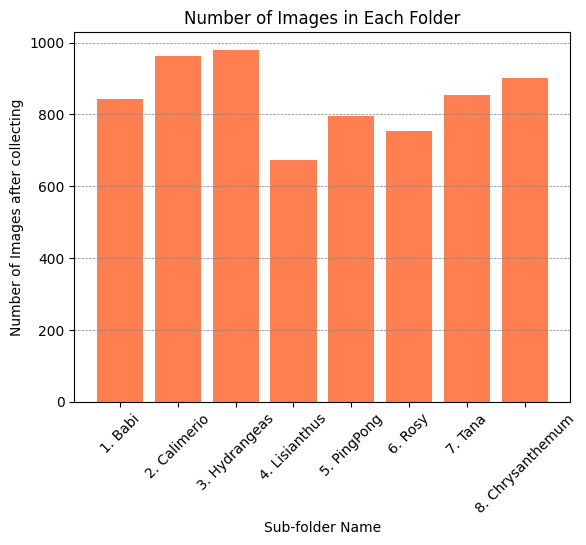

In [ ]:
# Create the bar chart
labels = list(sub_folder_counts.keys())
counts = list(sub_folder_counts.values())

plt.bar(labels, counts, color='coral')
plt.xlabel("Sub-folder Name")
plt.ylabel("Number of Images after collecting")
plt.title("Number of Images in Each Folder")
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', axis = 'y')
plt.xticks(rotation=45)
plt.show()

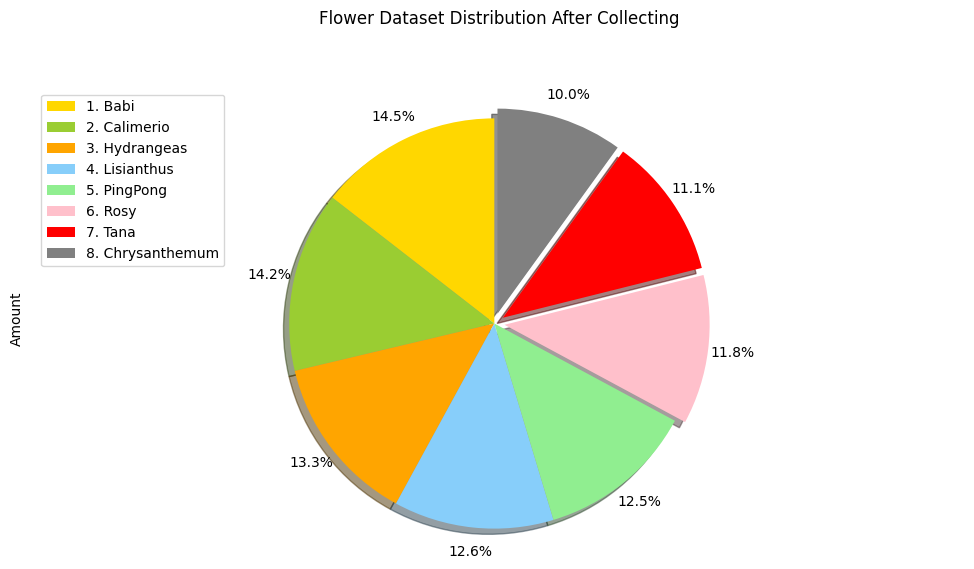

In [ ]:
# Create pie chart 
cols = ['Amount']
df = pd.DataFrame(sub_folder_counts, index = [0])
df = df.transpose()
df.columns = cols

colors_list = ['gold', 'yellowgreen', 'orange', 'lightskyblue', 'lightgreen', 'pink', 'red', 'gray']
explode_list = [0, 0, 0, 0, 0, 0.05, 0.05, 0.05] # ratio for each continent with which to offset each wedge.

df['Amount'].sort_values(ascending = False).plot(kind='pie',
                    figsize=(12, 6),
                    autopct='%1.1f%%', 
                    startangle=90,    
                    shadow=True,       
                    labels=None,         # turn off labels on pie chart
                    pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                    colors=colors_list,  # add custom colors
                    explode=explode_list 
                    )

# scale the title up by 12% to match pctdistance
plt.title('Flower Dataset Distribution After Collecting', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df.index, loc='upper left') 

plt.show()

Following the completion of the data preprocessing steps, the data have been evenly distributed. This can be seen in the distribution of flower datasets' barchart and piechart above. All of the images meet the requirements to be included in the model's training set.

# 3. Model Training

### a. Create the necessary classes and functions to load and transform the data

In PyTorch, while there is an ImageFolder class that can load images into a dataset, it automatically converts the images to tensors, and thus would rescale the pixel values to be between 0 and 1. Since we want to maintain the images for some visualisation, we created a CustomDataset class to load the images.

For data augmentation, train_transform and test_transform functions were defined to apply the necessary transformations to the images. Images in the dataset are resized, randomly flipped horizontally, randomly rotated, applied with colour jitter, and subsequently converted to tensors and normalised. Images in the test set are only resized, converted to tensors and normalised.

A third class called TransformDataset is also created to apply the transformations to the datasets.

Once all of these classes and functions are defined, we load the dataset using CustomDataset. Then, the images are split randomly in 60-20-20 ratio for training, validation and test sets respectively. These subsets are then passed into TransformDataset to be processed into the final datasets.

In [2]:
# Define a custom dataset class that inherits from torch.utils.data.Dataset
class CustomDataset(Dataset):
    def __init__(self, root):
        # Root is the directory that contains all the class folders
        self.root = root
        self.folders_paths = [os.path.join(root, folder) for folder in os.listdir(root)]
        self.classes = [folder.split("/")[-1] for folder in self.folders_paths]
        self.files = []
        for label, folder_path in enumerate(self.folders_paths):
            for file_name in os.listdir(folder_path):
                file_path = os.path.join(folder_path, file_name)
                self.files.append((file_path, label))

    def __getitem__(self, idx):
        # Return a sample and its corresponding label
        file_path, label = self.files[idx]
        # Open the image using PIL
        image = Image.open(file_path).convert('RGB')
        # Note: This returns an image in the form of a PIL object
        return image, label

    def __len__(self):
        # Return the number of samples
        return len(self.files)

    
# Create an instance of the custom dataset with a given root directory
root_dir = "final_data"
data = CustomDataset(root_dir)

# Split the dataset into train (60%), test (20%) and validation (20%) sets
train_size = int(0.6 * len(data))
test_size = int(0.2 * len(data))
val_size = len(data) - train_size - test_size
train_data, test_data, val_data = random_split(data, [train_size, test_size, val_size])

# Define different transformations for each dataset
train_transform  =   transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.1, hue=0.1),
        transforms.RandomAffine(degrees=40, translate=None, scale=(1, 2), shear=15),
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

transform_test = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

# Create a wrapper class to apply the transformations on the fly
class TransformDataset(Dataset):
    def __init__(self, subset, transform=None):
        self.subset = subset
        self.transform = transform

    def __getitem__(self, index):
        x, y = self.subset[index]
        if self.transform:
            x = self.transform(x)
        return x, y

    def __len__(self):
        return len(self.subset)

# Create transformed datasets using the wrapper class
train_data = TransformDataset(train_data, transform=train_transform)
test_data = TransformDataset(test_data, transform=transform_test)
val_data = TransformDataset(val_data, transform=transform_test)

# Create data loaders for each dataset with a given batch size
batch_size = 32
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=True)



### b. Defining the architecture for the model

For this project, our team considered the use of multiple architectures, including VGG, ResNet, as well as a ViT Transformer implementation. In the end, we decided to use ResNet-18 and submit this model as it performs better in our experiments.

In [21]:
model = resnet18(weights=None)

# Placeholder for future classifier layer
classifier = nn.Identity()
model.classifier = classifier

model.to(device)
net = model

criterion = nn.CrossEntropyLoss()
optimiser = optim.SGD(net.parameters(), lr=0.05)

### c. Training the network

In [19]:
def validation(net,dl_test):
    net.eval()
    correct=0
    total = 0
    for i, data in enumerate(dl_test, 0):
        # Get data from each batch. Data is in the format of [inputs, labels]
        inputs, labels = data
        inputs = inputs.cuda()
        labels = labels.cuda()

        # Reset the parameter gradients
        optimiser.zero_grad()

        # Forward pass, backward pass, and optimise
        outputs = net(inputs)
        
        correct += (torch.argmax(outputs,-1) == labels).float().sum()
        total += len(labels)

    return correct/total

In [ ]:
import copy
from tqdm import tqdm 


max_accuracy = 0
for epoch in range(200):  # Train for 200 epochs
    net.train()
    running_loss = 0.0
    train_acc = 0.0
    correct = 0
    pbar = tqdm(train_loader)

    for i, data in enumerate(pbar, 0):
        # Get data from each batch. Data is in the format of [inputs, labels]
        inputs, labels = data
        inputs = inputs.cuda()
        labels = labels.cuda()

        # Reset the parameter gradients
        optimiser.zero_grad()

        # Forward pass, backward pass, and optimise
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimiser.step()

        # Print 
        pbar.set_description(f"loss: {str(loss.item())}")

        running_loss += loss.item()
        correct += (torch.argmax(outputs,-1) == labels).float().sum()
    
    train_acc = correct/len(train_data)
    validation_acc = validation(net,val_loader)

    print(f'[Epoch: {epoch + 1}] train_loss: {running_loss / 127:.3f}, train_acc: {train_acc}, val_acc: {validation_acc}')

    if  validation_acc > max_accuracy:
        max_accuracy = validation_acc
        best_model = copy.deepcopy(net)
print('Finished Training')

loss: 2.4491822719573975:  31%|███▏      | 40/127 [00:07<00:15,  5.77it/s]c:\Users\Raven\AppData\Local\Programs\Python\Python310\lib\site-packages\PIL\Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
loss: 1.686102271080017: 100%|██████████| 127/127 [00:22<00:00,  5.74it/s] 


[epoch: 1] loss: 2.511,val_acc: 0.16703622043132782


loss: 2.0564799308776855: 100%|██████████| 127/127 [00:21<00:00,  5.89it/s]


[epoch: 2] loss: 1.913,val_acc: 0.2431633323431015


loss: 1.4382092952728271: 100%|██████████| 127/127 [00:21<00:00,  5.86it/s]


[epoch: 3] loss: 1.721,val_acc: 0.35254988074302673


loss: 1.264866590499878: 100%|██████████| 127/127 [00:21<00:00,  5.84it/s] 


[epoch: 4] loss: 1.623,val_acc: 0.3244641423225403


loss: 1.3993295431137085: 100%|██████████| 127/127 [00:21<00:00,  5.83it/s]


[epoch: 5] loss: 1.528,val_acc: 0.3754619359970093


loss: 1.280185580253601: 100%|██████████| 127/127 [00:21<00:00,  5.84it/s] 


[epoch: 6] loss: 1.470,val_acc: 0.41093865036964417


loss: 1.291824221611023: 100%|██████████| 127/127 [00:21<00:00,  5.85it/s] 


[epoch: 7] loss: 1.412,val_acc: 0.4375461935997009


loss: 1.1613280773162842: 100%|██████████| 127/127 [00:21<00:00,  5.80it/s]


[epoch: 8] loss: 1.326,val_acc: 0.46193644404411316


loss: 1.5511521100997925: 100%|██████████| 127/127 [00:22<00:00,  5.71it/s]


[epoch: 9] loss: 1.317,val_acc: 0.4146341383457184


loss: 0.9552410244941711: 100%|██████████| 127/127 [00:23<00:00,  5.44it/s]


[epoch: 10] loss: 1.276,val_acc: 0.5055432319641113


loss: 1.4181855916976929: 100%|██████████| 127/127 [00:21<00:00,  5.87it/s]


[epoch: 11] loss: 1.239,val_acc: 0.5173687934875488


loss: 1.5060341358184814: 100%|██████████| 127/127 [00:21<00:00,  5.86it/s]


[epoch: 12] loss: 1.191,val_acc: 0.486326664686203


loss: 1.178508996963501: 100%|██████████| 127/127 [00:21<00:00,  5.86it/s] 


[epoch: 13] loss: 1.169,val_acc: 0.40724316239356995


loss: 1.0961735248565674: 100%|██████████| 127/127 [00:21<00:00,  5.85it/s]


[epoch: 14] loss: 1.143,val_acc: 0.5602365136146545


loss: 0.9604325294494629: 100%|██████████| 127/127 [00:21<00:00,  5.85it/s]


[epoch: 15] loss: 1.128,val_acc: 0.581670343875885


loss: 1.4780511856079102: 100%|██████████| 127/127 [00:21<00:00,  5.86it/s]


[epoch: 16] loss: 1.095,val_acc: 0.5432372689247131


loss: 0.8538689017295837: 100%|██████████| 127/127 [00:21<00:00,  5.85it/s]


[epoch: 17] loss: 1.076,val_acc: 0.5735402703285217


loss: 0.7849032878875732: 100%|██████████| 127/127 [00:21<00:00,  5.85it/s]


[epoch: 18] loss: 1.044,val_acc: 0.6053215265274048


loss: 1.1240767240524292: 100%|██████████| 127/127 [00:21<00:00,  5.85it/s]


[epoch: 19] loss: 0.999,val_acc: 0.6164079904556274


loss: 0.6500639915466309: 100%|██████████| 127/127 [00:21<00:00,  5.86it/s]


[epoch: 20] loss: 0.989,val_acc: 0.599408745765686


loss: 0.7012995481491089: 100%|██████████| 127/127 [00:22<00:00,  5.72it/s]


[epoch: 21] loss: 0.991,val_acc: 0.5476718544960022


loss: 0.7642009854316711: 100%|██████████| 127/127 [00:21<00:00,  5.83it/s]


[epoch: 22] loss: 0.931,val_acc: 0.6341463327407837


loss: 0.6984664797782898: 100%|██████████| 127/127 [00:21<00:00,  5.85it/s]


[epoch: 23] loss: 0.916,val_acc: 0.6038433313369751


loss: 0.9732993841171265: 100%|██████████| 127/127 [00:21<00:00,  5.86it/s]


[epoch: 24] loss: 0.921,val_acc: 0.6201034784317017


loss: 0.6685178279876709: 100%|██████████| 127/127 [00:21<00:00,  5.86it/s]


[epoch: 25] loss: 0.878,val_acc: 0.6496673822402954


loss: 1.3458490371704102: 100%|██████████| 127/127 [00:21<00:00,  5.87it/s]


[epoch: 26] loss: 0.893,val_acc: 0.6008869409561157


loss: 0.4455162584781647: 100%|██████████| 127/127 [00:21<00:00,  5.88it/s]


[epoch: 27] loss: 0.871,val_acc: 0.6304508447647095


loss: 0.8787291049957275: 100%|██████████| 127/127 [00:21<00:00,  5.86it/s]


[epoch: 28] loss: 0.830,val_acc: 0.6267553567886353


loss: 0.7197304368019104: 100%|██████████| 127/127 [00:21<00:00,  5.87it/s]


[epoch: 29] loss: 0.834,val_acc: 0.6452327966690063


loss: 0.5704094171524048: 100%|██████████| 127/127 [00:21<00:00,  5.86it/s]


[epoch: 30] loss: 0.824,val_acc: 0.6622320413589478


loss: 0.9113394618034363: 100%|██████████| 127/127 [00:21<00:00,  5.88it/s]


[epoch: 31] loss: 0.810,val_acc: 0.6792313456535339


loss: 0.9773089289665222: 100%|██████████| 127/127 [00:21<00:00,  5.88it/s]


[epoch: 32] loss: 0.777,val_acc: 0.6511455774307251


loss: 0.9080531597137451: 100%|██████████| 127/127 [00:21<00:00,  5.87it/s] 


[epoch: 33] loss: 0.773,val_acc: 0.6223207712173462


loss: 0.63747638463974: 100%|██████████| 127/127 [00:21<00:00,  5.86it/s]   


[epoch: 34] loss: 0.748,val_acc: 0.6570583581924438


loss: 1.096186637878418: 100%|██████████| 127/127 [00:21<00:00,  5.87it/s]  


[epoch: 35] loss: 0.751,val_acc: 0.6452327966690063


loss: 0.8156473636627197: 100%|██████████| 127/127 [00:21<00:00,  5.87it/s] 


[epoch: 36] loss: 0.755,val_acc: 0.6474500894546509


loss: 1.2099800109863281: 100%|██████████| 127/127 [00:21<00:00,  5.85it/s] 


[epoch: 37] loss: 0.719,val_acc: 0.6363636255264282


loss: 1.2025927305221558: 100%|██████████| 127/127 [00:21<00:00,  5.88it/s] 


[epoch: 38] loss: 0.712,val_acc: 0.6659275889396667


loss: 0.9301019310951233: 100%|██████████| 127/127 [00:21<00:00,  5.87it/s]


[epoch: 39] loss: 0.706,val_acc: 0.6659275889396667


loss: 0.5904029011726379: 100%|██████████| 127/127 [00:21<00:00,  5.86it/s] 


[epoch: 40] loss: 0.684,val_acc: 0.6881005167961121


loss: 1.1603915691375732: 100%|██████████| 127/127 [00:21<00:00,  5.85it/s] 


[epoch: 41] loss: 0.676,val_acc: 0.669623076915741


loss: 0.6937751173973083: 100%|██████████| 127/127 [00:21<00:00,  5.87it/s] 


[epoch: 42] loss: 0.684,val_acc: 0.7294900417327881


loss: 0.6546799540519714: 100%|██████████| 127/127 [00:21<00:00,  5.84it/s] 


[epoch: 43] loss: 0.652,val_acc: 0.683665931224823


loss: 0.7510963678359985: 100%|██████████| 127/127 [00:21<00:00,  5.87it/s] 


[epoch: 44] loss: 0.647,val_acc: 0.7058388590812683


loss: 0.5444750785827637: 100%|██████████| 127/127 [00:21<00:00,  5.84it/s] 


[epoch: 45] loss: 0.636,val_acc: 0.683665931224823


loss: 0.5699384212493896: 100%|██████████| 127/127 [00:21<00:00,  5.79it/s] 


[epoch: 46] loss: 0.618,val_acc: 0.6962305903434753


loss: 0.8502180576324463: 100%|██████████| 127/127 [00:22<00:00,  5.75it/s] 


[epoch: 47] loss: 0.622,val_acc: 0.6888396143913269


loss: 0.613893985748291: 100%|██████████| 127/127 [00:22<00:00,  5.73it/s]  


[epoch: 48] loss: 0.601,val_acc: 0.6444936990737915


loss: 0.5094214677810669: 100%|██████████| 127/127 [00:21<00:00,  5.80it/s] 


[epoch: 49] loss: 0.586,val_acc: 0.6821877360343933


loss: 0.48645761609077454: 100%|██████████| 127/127 [00:21<00:00,  5.80it/s]


[epoch: 50] loss: 0.588,val_acc: 0.6947523951530457


loss: 0.4905640184879303: 100%|██████████| 127/127 [00:21<00:00,  5.80it/s] 


[epoch: 51] loss: 0.600,val_acc: 0.7354028224945068


loss: 0.9055107235908508: 100%|██████████| 127/127 [00:21<00:00,  5.82it/s] 


[epoch: 52] loss: 0.564,val_acc: 0.6844050288200378


loss: 0.6537396311759949: 100%|██████████| 127/127 [00:21<00:00,  5.83it/s] 


[epoch: 53] loss: 0.571,val_acc: 0.6171470880508423


loss: 0.6694740653038025: 100%|██████████| 127/127 [00:21<00:00,  5.79it/s] 


[epoch: 54] loss: 0.538,val_acc: 0.6881005167961121


loss: 0.8764266967773438: 100%|██████████| 127/127 [00:21<00:00,  5.79it/s] 


[epoch: 55] loss: 0.547,val_acc: 0.6858832240104675


loss: 0.4641331434249878: 100%|██████████| 127/127 [00:21<00:00,  5.79it/s] 


[epoch: 56] loss: 0.528,val_acc: 0.7294900417327881


loss: 0.43633219599723816: 100%|██████████| 127/127 [00:22<00:00,  5.75it/s]


[epoch: 57] loss: 0.542,val_acc: 0.7420547008514404


loss: 0.8052906394004822: 100%|██████████| 127/127 [00:21<00:00,  5.79it/s] 


[epoch: 58] loss: 0.535,val_acc: 0.7191426157951355


loss: 0.6532334089279175: 100%|██████████| 127/127 [00:21<00:00,  5.83it/s] 


[epoch: 59] loss: 0.524,val_acc: 0.6533628702163696


loss: 0.6145294904708862: 100%|██████████| 127/127 [00:21<00:00,  5.82it/s] 


[epoch: 60] loss: 0.525,val_acc: 0.7043606638908386


loss: 0.3651992082595825: 100%|██████████| 127/127 [00:21<00:00,  5.89it/s] 


[epoch: 61] loss: 0.504,val_acc: 0.7553584575653076


loss: 0.33162420988082886: 100%|██████████| 127/127 [00:21<00:00,  5.84it/s]


[epoch: 62] loss: 0.488,val_acc: 0.7324464321136475


loss: 0.22158676385879517: 100%|██████████| 127/127 [00:21<00:00,  5.82it/s]


[epoch: 63] loss: 0.480,val_acc: 0.7546193599700928


loss: 0.5640009045600891: 100%|██████████| 127/127 [00:21<00:00,  5.82it/s] 


[epoch: 64] loss: 0.465,val_acc: 0.7036215662956238


loss: 0.5543768405914307: 100%|██████████| 127/127 [00:21<00:00,  5.79it/s] 


[epoch: 65] loss: 0.482,val_acc: 0.7339246273040771


loss: 0.6069484949111938: 100%|██████████| 127/127 [00:21<00:00,  5.87it/s] 


[epoch: 66] loss: 0.457,val_acc: 0.7065779566764832


loss: 0.3872146010398865: 100%|██████████| 127/127 [00:21<00:00,  5.84it/s] 


[epoch: 67] loss: 0.475,val_acc: 0.7538802623748779


loss: 0.3489263653755188: 100%|██████████| 127/127 [00:21<00:00,  5.85it/s] 


[epoch: 68] loss: 0.462,val_acc: 0.7368810176849365


loss: 0.8225951194763184: 100%|██████████| 127/127 [00:21<00:00,  5.80it/s] 


[epoch: 69] loss: 0.444,val_acc: 0.6888396143913269


loss: 0.3007364571094513: 100%|██████████| 127/127 [00:21<00:00,  5.80it/s] 


[epoch: 70] loss: 0.452,val_acc: 0.716925323009491


loss: 0.35764941573143005: 100%|██████████| 127/127 [00:21<00:00,  5.83it/s]


[epoch: 71] loss: 0.447,val_acc: 0.7014042735099792


loss: 0.2887130379676819: 100%|██████████| 127/127 [00:21<00:00,  5.79it/s] 


[epoch: 72] loss: 0.418,val_acc: 0.7531411647796631


loss: 0.4082289934158325: 100%|██████████| 127/127 [00:21<00:00,  5.85it/s] 


[epoch: 73] loss: 0.427,val_acc: 0.7597930431365967


loss: 0.3974282443523407: 100%|██████████| 127/127 [00:21<00:00,  5.82it/s] 


[epoch: 74] loss: 0.430,val_acc: 0.7553584575653076


loss: 0.10360885411500931: 100%|██████████| 127/127 [00:22<00:00,  5.76it/s]


[epoch: 75] loss: 0.427,val_acc: 0.7634885311126709


loss: 0.5947292447090149: 100%|██████████| 127/127 [00:21<00:00,  5.79it/s] 


[epoch: 76] loss: 0.430,val_acc: 0.683665931224823


loss: 0.4980809986591339: 100%|██████████| 127/127 [00:21<00:00,  5.82it/s] 


[epoch: 77] loss: 0.404,val_acc: 0.7420547008514404


loss: 0.3516603708267212: 100%|██████████| 127/127 [00:21<00:00,  5.80it/s] 


[epoch: 78] loss: 0.403,val_acc: 0.7871396541595459


loss: 0.40823015570640564: 100%|██████████| 127/127 [00:21<00:00,  5.88it/s]


[epoch: 79] loss: 0.396,val_acc: 0.6814486384391785


loss: 0.3818895220756531: 100%|██████████| 127/127 [00:21<00:00,  5.87it/s] 


[epoch: 80] loss: 0.400,val_acc: 0.7184035181999207


loss: 0.12577758729457855: 100%|██████████| 127/127 [00:21<00:00,  5.89it/s]


[epoch: 81] loss: 0.390,val_acc: 0.7841832637786865


loss: 0.40052545070648193: 100%|██████████| 127/127 [00:21<00:00,  5.86it/s]


[epoch: 82] loss: 0.361,val_acc: 0.7361419200897217


loss: 0.3193643391132355: 100%|██████████| 127/127 [00:21<00:00,  5.84it/s] 


[epoch: 83] loss: 0.368,val_acc: 0.7383592128753662


loss: 0.35767868161201477: 100%|██████████| 127/127 [00:21<00:00,  5.86it/s]


[epoch: 84] loss: 0.363,val_acc: 0.7509238719940186


loss: 0.2078862339258194: 100%|██████████| 127/127 [00:21<00:00,  5.86it/s] 


[epoch: 85] loss: 0.349,val_acc: 0.7331855297088623


loss: 0.3813970685005188: 100%|██████████| 127/127 [00:21<00:00,  5.84it/s] 


[epoch: 86] loss: 0.341,val_acc: 0.7738358974456787


loss: 0.17377817630767822: 100%|██████████| 127/127 [00:21<00:00,  5.85it/s]


[epoch: 87] loss: 0.366,val_acc: 0.786400556564331


loss: 0.5957698225975037: 100%|██████████| 127/127 [00:21<00:00,  5.85it/s] 


[epoch: 88] loss: 0.342,val_acc: 0.6991869807243347


loss: 0.3449404239654541: 100%|██████████| 127/127 [00:21<00:00,  5.86it/s] 


[epoch: 89] loss: 0.367,val_acc: 0.7317073345184326


loss: 0.219223290681839: 100%|██████████| 127/127 [00:21<00:00,  5.86it/s]  


[epoch: 90] loss: 0.345,val_acc: 0.7716186046600342


loss: 0.4316784143447876: 100%|██████████| 127/127 [00:21<00:00,  5.87it/s] 


[epoch: 91] loss: 0.355,val_acc: 0.6637102961540222


loss: 0.12614589929580688: 100%|██████████| 127/127 [00:21<00:00,  5.86it/s]


[epoch: 92] loss: 0.346,val_acc: 0.7575757503509521


loss: 0.3612501323223114: 100%|██████████| 127/127 [00:21<00:00,  5.78it/s] 


[epoch: 93] loss: 0.340,val_acc: 0.7317073345184326


loss: 0.4409196376800537: 100%|██████████| 127/127 [00:21<00:00,  5.84it/s] 


[epoch: 94] loss: 0.337,val_acc: 0.744271993637085


loss: 0.30321234464645386: 100%|██████████| 127/127 [00:21<00:00,  5.87it/s]


[epoch: 95] loss: 0.340,val_acc: 0.7524020671844482


loss: 0.2978745996952057: 100%|██████████| 127/127 [00:21<00:00,  5.87it/s] 


[epoch: 96] loss: 0.307,val_acc: 0.7664449214935303


loss: 0.31515222787857056: 100%|██████████| 127/127 [00:21<00:00,  5.88it/s]


[epoch: 97] loss: 0.320,val_acc: 0.7642276287078857


loss: 0.17536363005638123: 100%|██████████| 127/127 [00:21<00:00,  5.87it/s]


[epoch: 98] loss: 0.321,val_acc: 0.7546193599700928


loss: 0.41174766421318054: 100%|██████████| 127/127 [00:21<00:00,  5.85it/s]


[epoch: 99] loss: 0.334,val_acc: 0.7597930431365967


loss: 0.20757296681404114: 100%|██████████| 127/127 [00:21<00:00,  5.84it/s]


[epoch: 100] loss: 0.283,val_acc: 0.7664449214935303


loss: 0.40473365783691406: 100%|██████████| 127/127 [00:21<00:00,  5.86it/s]


[epoch: 101] loss: 0.283,val_acc: 0.76792311668396


loss: 0.23429708182811737: 100%|██████████| 127/127 [00:21<00:00,  5.86it/s]


[epoch: 102] loss: 0.298,val_acc: 0.7767922878265381


loss: 0.22536106407642365: 100%|██████████| 127/127 [00:21<00:00,  5.88it/s]


[epoch: 103] loss: 0.292,val_acc: 0.762749433517456


loss: 0.15910251438617706: 100%|██████████| 127/127 [00:21<00:00,  5.87it/s]


[epoch: 104] loss: 0.279,val_acc: 0.7649667263031006


loss: 0.5327039361000061: 100%|██████████| 127/127 [00:21<00:00,  5.85it/s] 


[epoch: 105] loss: 0.301,val_acc: 0.7708795070648193


loss: 0.16797402501106262: 100%|██████████| 127/127 [00:21<00:00,  5.86it/s]


[epoch: 106] loss: 0.272,val_acc: 0.7649667263031006


loss: 0.2157086431980133: 100%|██████████| 127/127 [00:21<00:00,  5.86it/s] 


[epoch: 107] loss: 0.287,val_acc: 0.7745749950408936


loss: 0.2144135683774948: 100%|██████████| 127/127 [00:21<00:00,  5.88it/s] 


[epoch: 108] loss: 0.279,val_acc: 0.7856614589691162


loss: 0.2535300552845001: 100%|██████████| 127/127 [00:21<00:00,  5.87it/s] 


[epoch: 109] loss: 0.280,val_acc: 0.7930524945259094


loss: 0.07907471805810928: 100%|██████████| 127/127 [00:21<00:00,  5.87it/s]


[epoch: 110] loss: 0.272,val_acc: 0.7812268733978271


loss: 0.2600313425064087: 100%|██████████| 127/127 [00:21<00:00,  5.88it/s] 


[epoch: 111] loss: 0.273,val_acc: 0.7450110912322998


loss: 0.25110745429992676: 100%|██████████| 127/127 [00:21<00:00,  5.87it/s]


[epoch: 112] loss: 0.264,val_acc: 0.7701404094696045


loss: 0.1540132462978363: 100%|██████████| 127/127 [00:21<00:00,  5.86it/s] 


[epoch: 113] loss: 0.267,val_acc: 0.7590539455413818


loss: 0.3296539783477783: 100%|██████████| 127/127 [00:21<00:00,  5.86it/s] 


[epoch: 114] loss: 0.257,val_acc: 0.7634885311126709


loss: 0.09772945195436478: 100%|██████████| 127/127 [00:21<00:00,  5.85it/s]


[epoch: 115] loss: 0.267,val_acc: 0.786400556564331


loss: 0.2734529972076416: 100%|██████████| 127/127 [00:21<00:00,  5.86it/s] 


[epoch: 116] loss: 0.264,val_acc: 0.748706579208374


loss: 1.216903567314148: 100%|██████████| 127/127 [00:21<00:00,  5.88it/s]  


[epoch: 117] loss: 0.253,val_acc: 0.7405765056610107


loss: 0.1997961699962616: 100%|██████████| 127/127 [00:21<00:00,  5.86it/s] 


[epoch: 118] loss: 0.250,val_acc: 0.7575757503509521


loss: 0.28396785259246826: 100%|██████████| 127/127 [00:21<00:00,  5.87it/s]


[epoch: 119] loss: 0.251,val_acc: 0.7797486782073975


loss: 0.3190348446369171: 100%|██████████| 127/127 [00:21<00:00,  5.85it/s] 


[epoch: 120] loss: 0.243,val_acc: 0.7790095806121826


loss: 0.12200800329446793: 100%|██████████| 127/127 [00:21<00:00,  5.89it/s]


[epoch: 121] loss: 0.238,val_acc: 0.762749433517456


loss: 0.4170549809932709: 100%|██████████| 127/127 [00:21<00:00,  5.86it/s] 


[epoch: 122] loss: 0.233,val_acc: 0.7871396541595459


loss: 0.14871276915073395: 100%|██████████| 127/127 [00:21<00:00,  5.87it/s]


[epoch: 123] loss: 0.243,val_acc: 0.7686622142791748


loss: 0.2639407217502594: 100%|██████████| 127/127 [00:21<00:00,  5.87it/s] 


[epoch: 124] loss: 0.215,val_acc: 0.7871396541595459


loss: 0.1707584410905838: 100%|██████████| 127/127 [00:21<00:00,  5.88it/s] 


[epoch: 125] loss: 0.234,val_acc: 0.7413156032562256


loss: 0.5188577175140381: 100%|██████████| 127/127 [00:21<00:00,  5.87it/s] 


[epoch: 126] loss: 0.239,val_acc: 0.7531411647796631


loss: 0.4872913360595703: 100%|██████████| 127/127 [00:21<00:00,  5.87it/s]  


[epoch: 127] loss: 0.225,val_acc: 0.7708795070648193


loss: 0.4281509518623352: 100%|██████████| 127/127 [00:21<00:00,  5.87it/s] 


[epoch: 128] loss: 0.244,val_acc: 0.7516629695892334


loss: 0.3422551453113556: 100%|██████████| 127/127 [00:21<00:00,  5.86it/s] 


[epoch: 129] loss: 0.215,val_acc: 0.7612712383270264


loss: 0.15032170712947845: 100%|██████████| 127/127 [00:21<00:00,  5.84it/s]


[epoch: 130] loss: 0.225,val_acc: 0.7694013118743896


loss: 0.36007583141326904: 100%|██████████| 127/127 [00:21<00:00,  5.84it/s]


[epoch: 131] loss: 0.217,val_acc: 0.7657058238983154


loss: 0.08926311880350113: 100%|██████████| 127/127 [00:21<00:00,  5.87it/s]


[epoch: 132] loss: 0.225,val_acc: 0.7878787517547607


loss: 0.4447360932826996: 100%|██████████| 127/127 [00:21<00:00,  5.84it/s] 


[epoch: 133] loss: 0.201,val_acc: 0.7058388590812683


loss: 0.221948504447937: 100%|██████████| 127/127 [00:21<00:00,  5.88it/s]  


[epoch: 134] loss: 0.207,val_acc: 0.7745749950408936


loss: 0.2976391017436981: 100%|██████████| 127/127 [00:21<00:00,  5.87it/s] 


[epoch: 135] loss: 0.201,val_acc: 0.7856614589691162


loss: 0.2626968026161194: 100%|██████████| 127/127 [00:21<00:00,  5.88it/s] 


[epoch: 136] loss: 0.189,val_acc: 0.7797486782073975


loss: 0.28693947196006775: 100%|██████████| 127/127 [00:21<00:00,  5.88it/s]


[epoch: 137] loss: 0.186,val_acc: 0.7893570065498352


loss: 0.08149877935647964: 100%|██████████| 127/127 [00:21<00:00,  5.87it/s]


[epoch: 138] loss: 0.211,val_acc: 0.7753140926361084


loss: 0.13350559771060944: 100%|██████████| 127/127 [00:21<00:00,  5.84it/s]


[epoch: 139] loss: 0.182,val_acc: 0.7974870800971985


loss: 0.5855107307434082: 100%|██████████| 127/127 [00:21<00:00,  5.86it/s]  


[epoch: 140] loss: 0.213,val_acc: 0.7331855297088623


loss: 0.1804373413324356: 100%|██████████| 127/127 [00:21<00:00,  5.88it/s] 


[epoch: 141] loss: 0.217,val_acc: 0.7730967998504639


loss: 0.0274758692830801: 100%|██████████| 127/127 [00:21<00:00,  5.89it/s]  


[epoch: 142] loss: 0.195,val_acc: 0.7849223613739014


loss: 0.20674952864646912: 100%|██████████| 127/127 [00:21<00:00,  5.86it/s] 


[epoch: 143] loss: 0.175,val_acc: 0.7841832637786865


loss: 0.12913766503334045: 100%|██████████| 127/127 [00:21<00:00,  5.88it/s]


[epoch: 144] loss: 0.192,val_acc: 0.7915742993354797


loss: 0.06713779270648956: 100%|██████████| 127/127 [00:21<00:00,  5.87it/s]


[epoch: 145] loss: 0.194,val_acc: 0.7982261776924133


loss: 0.12840168178081512: 100%|██████████| 127/127 [00:21<00:00,  5.87it/s] 


[epoch: 146] loss: 0.184,val_acc: 0.7590539455413818


loss: 0.2108408659696579: 100%|██████████| 127/127 [00:21<00:00,  5.86it/s]  


[epoch: 147] loss: 0.188,val_acc: 0.7671840190887451


loss: 0.32498544454574585: 100%|██████████| 127/127 [00:21<00:00,  5.85it/s]


[epoch: 148] loss: 0.173,val_acc: 0.79009610414505


loss: 0.15915106236934662: 100%|██████████| 127/127 [00:21<00:00,  5.87it/s]


[epoch: 149] loss: 0.206,val_acc: 0.7804877758026123


loss: 0.12554195523262024: 100%|██████████| 127/127 [00:21<00:00,  5.84it/s]


[epoch: 150] loss: 0.181,val_acc: 0.7930524945259094


loss: 0.15242721140384674: 100%|██████████| 127/127 [00:21<00:00,  5.83it/s]


[epoch: 151] loss: 0.175,val_acc: 0.7908352017402649


loss: 0.4522289037704468: 100%|██████████| 127/127 [00:21<00:00,  5.87it/s] 


[epoch: 152] loss: 0.178,val_acc: 0.758314847946167


loss: 0.12460166960954666: 100%|██████████| 127/127 [00:21<00:00,  5.85it/s] 


[epoch: 153] loss: 0.176,val_acc: 0.7812268733978271


loss: 0.2179546356201172: 100%|██████████| 127/127 [00:21<00:00,  5.87it/s]  


[epoch: 154] loss: 0.151,val_acc: 0.7937915921211243


loss: 0.13512593507766724: 100%|██████████| 127/127 [00:21<00:00,  5.87it/s]


[epoch: 155] loss: 0.155,val_acc: 0.7930524945259094


loss: 0.06710246205329895: 100%|██████████| 127/127 [00:21<00:00,  5.86it/s] 


[epoch: 156] loss: 0.168,val_acc: 0.799704372882843


loss: 0.15576857328414917: 100%|██████████| 127/127 [00:21<00:00,  5.87it/s] 


[epoch: 157] loss: 0.156,val_acc: 0.7960088849067688


loss: 0.19538891315460205: 100%|██████████| 127/127 [00:21<00:00,  5.85it/s]


[epoch: 158] loss: 0.184,val_acc: 0.7812268733978271


loss: 0.03716408833861351: 100%|██████████| 127/127 [00:21<00:00,  5.88it/s] 


[epoch: 159] loss: 0.151,val_acc: 0.7834441661834717


loss: 0.1243627592921257: 100%|██████████| 127/127 [00:21<00:00,  5.87it/s]  


[epoch: 160] loss: 0.173,val_acc: 0.7915742993354797


loss: 0.07411612570285797: 100%|██████████| 127/127 [00:21<00:00,  5.85it/s]


[epoch: 161] loss: 0.169,val_acc: 0.7989652752876282


loss: 0.12059386819601059: 100%|██████████| 127/127 [00:21<00:00,  5.88it/s]


[epoch: 162] loss: 0.165,val_acc: 0.7967479825019836


loss: 0.11499375849962234: 100%|██████████| 127/127 [00:21<00:00,  5.86it/s] 


[epoch: 163] loss: 0.158,val_acc: 0.7945306897163391


loss: 0.20606248080730438: 100%|██████████| 127/127 [00:21<00:00,  5.85it/s] 


[epoch: 164] loss: 0.171,val_acc: 0.7797486782073975


loss: 0.2765958607196808: 100%|██████████| 127/127 [00:21<00:00,  5.86it/s]  


[epoch: 165] loss: 0.149,val_acc: 0.7538802623748779


loss: 0.18205152451992035: 100%|██████████| 127/127 [00:21<00:00,  5.86it/s]


[epoch: 166] loss: 0.132,val_acc: 0.7568366527557373


loss: 0.10904484242200851: 100%|██████████| 127/127 [00:21<00:00,  5.89it/s] 


[epoch: 167] loss: 0.159,val_acc: 0.7967479825019836


loss: 0.11441083252429962: 100%|██████████| 127/127 [00:21<00:00,  5.88it/s] 


[epoch: 168] loss: 0.159,val_acc: 0.7671840190887451


loss: 0.2598508596420288: 100%|██████████| 127/127 [00:21<00:00,  5.88it/s]  


[epoch: 169] loss: 0.149,val_acc: 0.7538802623748779


loss: 0.12056251615285873: 100%|██████████| 127/127 [00:21<00:00,  5.88it/s] 


[epoch: 170] loss: 0.134,val_acc: 0.7834441661834717


loss: 0.05769549310207367: 100%|██████████| 127/127 [00:21<00:00,  5.88it/s] 


[epoch: 171] loss: 0.133,val_acc: 0.8100517392158508


loss: 0.5440739393234253: 100%|██████████| 127/127 [00:21<00:00,  5.89it/s]  


[epoch: 172] loss: 0.138,val_acc: 0.7642276287078857


loss: 0.2278059720993042: 100%|██████████| 127/127 [00:21<00:00,  5.89it/s]  


[epoch: 173] loss: 0.148,val_acc: 0.762749433517456


loss: 0.15300823748111725: 100%|██████████| 127/127 [00:21<00:00,  5.87it/s] 


[epoch: 174] loss: 0.160,val_acc: 0.7767922878265381


loss: 0.04027924686670303: 100%|██████████| 127/127 [00:21<00:00,  5.89it/s] 


[epoch: 175] loss: 0.158,val_acc: 0.7908352017402649


loss: 0.1316763162612915: 100%|██████████| 127/127 [00:21<00:00,  5.89it/s]  


[epoch: 176] loss: 0.143,val_acc: 0.7930524945259094


loss: 0.08207434415817261: 100%|██████████| 127/127 [00:21<00:00,  5.89it/s] 


[epoch: 177] loss: 0.146,val_acc: 0.76792311668396


loss: 0.14359703660011292: 100%|██████████| 127/127 [00:21<00:00,  5.88it/s] 


[epoch: 178] loss: 0.140,val_acc: 0.7694013118743896


loss: 0.1469564139842987: 100%|██████████| 127/127 [00:22<00:00,  5.77it/s]  


[epoch: 179] loss: 0.131,val_acc: 0.7937915921211243


loss: 0.12089362740516663: 100%|██████████| 127/127 [00:22<00:00,  5.71it/s] 


[epoch: 180] loss: 0.136,val_acc: 0.7974870800971985


loss: 0.0962386205792427: 100%|██████████| 127/127 [00:21<00:00,  5.86it/s]  


[epoch: 181] loss: 0.131,val_acc: 0.7738358974456787


loss: 0.053975123912096024: 100%|██████████| 127/127 [00:21<00:00,  5.87it/s]


[epoch: 182] loss: 0.123,val_acc: 0.79009610414505


loss: 0.10043339431285858: 100%|██████████| 127/127 [00:21<00:00,  5.87it/s] 


[epoch: 183] loss: 0.113,val_acc: 0.8048780560493469


loss: 0.08347201347351074: 100%|██████████| 127/127 [00:21<00:00,  5.86it/s] 


[epoch: 184] loss: 0.127,val_acc: 0.7915742993354797


loss: 0.18809020519256592: 100%|██████████| 127/127 [00:21<00:00,  5.85it/s] 


[epoch: 185] loss: 0.129,val_acc: 0.8041389584541321


loss: 0.11065720021724701: 100%|██████████| 127/127 [00:21<00:00,  5.87it/s] 


[epoch: 186] loss: 0.135,val_acc: 0.7804877758026123


loss: 0.03006891906261444: 100%|██████████| 127/127 [00:21<00:00,  5.88it/s] 


[epoch: 187] loss: 0.153,val_acc: 0.7775313854217529


loss: 0.06914274394512177: 100%|██████████| 127/127 [00:21<00:00,  5.88it/s] 


[epoch: 188] loss: 0.153,val_acc: 0.7760531902313232


loss: 0.13151252269744873: 100%|██████████| 127/127 [00:21<00:00,  5.87it/s] 


[epoch: 189] loss: 0.121,val_acc: 0.7531411647796631


loss: 0.3231359124183655: 100%|██████████| 127/127 [00:21<00:00,  5.87it/s] 


[epoch: 190] loss: 0.137,val_acc: 0.7856614589691162


loss: 0.052206363528966904: 100%|██████████| 127/127 [00:21<00:00,  5.84it/s]


[epoch: 191] loss: 0.134,val_acc: 0.8019216656684875


loss: 0.08083763718605042: 100%|██████████| 127/127 [00:21<00:00,  5.86it/s] 


[epoch: 192] loss: 0.112,val_acc: 0.8019216656684875


loss: 0.1446303427219391: 100%|██████████| 127/127 [00:21<00:00,  5.85it/s]  


[epoch: 193] loss: 0.124,val_acc: 0.7708795070648193


loss: 0.17230284214019775: 100%|██████████| 127/127 [00:21<00:00,  5.85it/s] 


[epoch: 194] loss: 0.115,val_acc: 0.7967479825019836


loss: 0.07464784383773804: 100%|██████████| 127/127 [00:21<00:00,  5.86it/s] 


[epoch: 195] loss: 0.115,val_acc: 0.8026607632637024


loss: 0.24002397060394287: 100%|██████████| 127/127 [00:21<00:00,  5.85it/s]


[epoch: 196] loss: 0.137,val_acc: 0.7886179089546204


loss: 0.2942867875099182: 100%|██████████| 127/127 [00:21<00:00,  5.86it/s]  


[epoch: 197] loss: 0.112,val_acc: 0.7893570065498352


loss: 0.18694356083869934: 100%|██████████| 127/127 [00:21<00:00,  5.84it/s] 


[epoch: 198] loss: 0.136,val_acc: 0.7893570065498352


loss: 0.10415592044591904: 100%|██████████| 127/127 [00:21<00:00,  5.86it/s] 


[epoch: 199] loss: 0.112,val_acc: 0.7827050685882568


loss: 0.1399768441915512: 100%|██████████| 127/127 [00:21<00:00,  5.85it/s]  


[epoch: 200] loss: 0.119,val_acc: 0.7620103359222412
Finished Training


## d. Saving (and loading) model.

In [17]:
model_dir = os.path.join(os.getcwd(), 'model-100', 'pt-resnet')
if not os.path.exists(model_dir):
    os.makedirs(model_dir)
# torch.save(best_model, os.path.join(model_dir, 'model.pth'))
best_model = torch.load(os.path.join(model_dir, 'model.pth'))

## e. Validate the models.

In [22]:
print(f"Accuracy on validation data: {validation(best_model, test_loader)}")

c:\Users\Raven\AppData\Local\Programs\Python\Python310\lib\site-packages\PIL\Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Accuracy on validation data: 0.9016999006271362
